#ATSC 405 Day 11 Assignment
##Bryan Jansens

-----

##First objective: Put my sounding on a tephigram based on skew_coords.ipynb.

My sounding is for Iqaluit sometime in the winter. I can put this on the tephigram by changing the name of the .f file in skew_coords.ipynb. Note that I also have to fiddle with a bunch of x-limits in makeSkew.py.

In [1]:
import pandas as pd
import h5py
from pprint import pformat
print(display.__module__)

IPython.core.display


In [2]:
from a405skewT.makeSkew import makeSkewDry
import a405skewT.makeSkew
from importlib import reload
reload(a405skewT.makeSkew)

<module 'a405skewT.makeSkew' from 'C:\\Users\\Bryan\\repos\\A405\\a405skewT\\makeSkew.py'>

In [4]:
def convertSkewToTemp(xcoord, press, skew):
    """
    convertSkewToTemp(xcoord, press, skew)

    Determines temperature from knowledge of a plotting coordinate
    system and corresponding plot skew.
    
    Parameters
    - - - - - -
    xcoord : int
        X coordinate in temperature plotting coordinates.
    press : float
        Pressure (hPa).
    skew : int
        Skew of a given coordinate system.

    Returns
    - - - -
    Temp : float
        Converted temperature in degC.

    Examples
    - - - - -
    >>> convertSkewToTemp(300, 8.e4, 30)
    638.6934574096806
    
    """
    Temp = xcoord  + skew * np.log(press);
    return Temp

def convertTempToSkew(Temp, press, skew):
    """
    convertTempToSkew(Temp, press, skew)

    Determines the transformed temperature in plotting coordinates.
    
    Parameters
    - - - - - -
    Temp : float
        Temperature (degC)
    press : float
        Pressure (hPa).
    skew : int
        Designated skew factor of temperature.

    Returns
    - - - -
    tempOut : float
        Converted temperature (degC).

    Examples
    - - - - -
    >>> convertTempToSkew(30., 8.e4, 30)
    -308.69345740968055
    
    """
    
    tempOut = Temp - skew * np.log(press);
    return tempOut

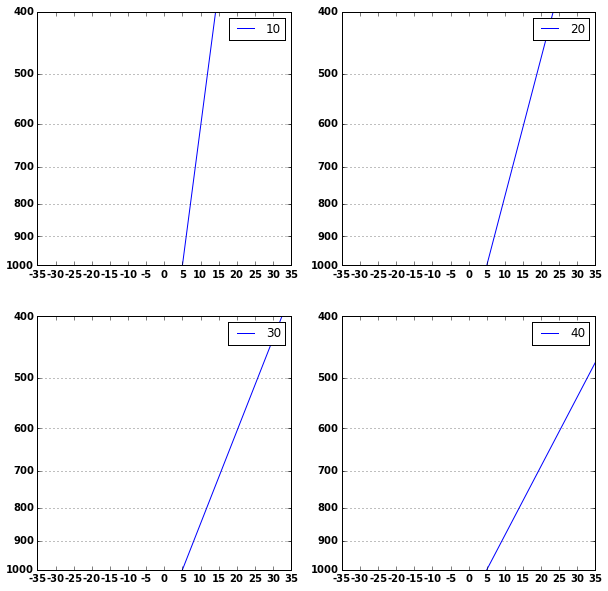

In [16]:
%matplotlib inline
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes=axes.ravel()  #axes comes back as a 2x2 array, flatten it
press=np.linspace(200,1000,30)
the_temp=5.
linelist=[]
skew_vals=[10,20,30, 40]
for ax,skew in zip(axes,skew_vals):
    xcoord=convertTempToSkew(the_temp,press,skew)
    ax.plot(xcoord,press,label=skew)
    ax.invert_yaxis()
    ax.set_yscale('log')
    locs = np.array(range(100, 1100, 100))
    labels = locs
    ax.set_yticks(locs)
    ax.set_yticklabels(labels) # Conventionally labels semilog graph.
    ax.set_ybound((400, 1000))
    plt.setp(ax.get_xticklabels(), weight='bold')
    plt.setp(ax.get_yticklabels(), weight='bold')
    ax.yaxis.grid(True)
    out=ax.legend()
    TempTickLabels = range(-45, 40, 5)
    TempTickCoords = TempTickLabels
    skewTickCoords = convertTempToSkew(TempTickCoords, 1.e3, skew)
    ax.set_xticks(skewTickCoords)
    out=ax.set_xticklabels(TempTickLabels)
    skewLimits = convertTempToSkew([-35, 35], 1.e3, skew)
    out=ax.set(xlim=skewLimits)

In [50]:
from a405skewT.makeSkew import makeSkewDry
import a405skewT.makeSkew
from importlib import reload
reload(a405skewT.makeSkew)

<module 'a405skewT.makeSkew' from 'C:\\Users\\Bryan\\repos\\A405\\a405skewT\\makeSkew.py'>

C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


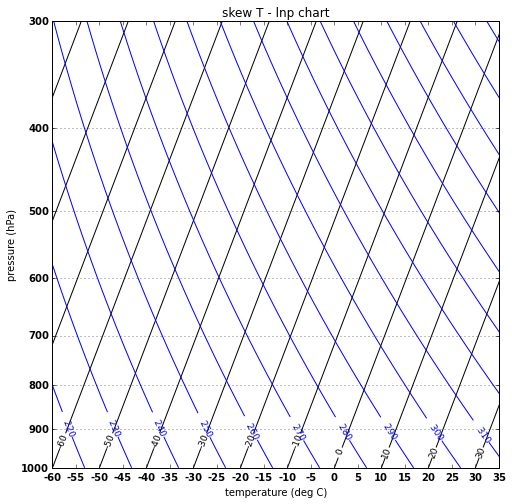

In [51]:
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax,skew = makeSkewDry(ax)

In [10]:
filename='out.h5';
print('reading file: %s\n' %filename)

attributes={}
with h5py.File(filename,'r') as f:
    keys=f.attrs.keys()
    for key in keys:
        try:
            attributes[key]=f.attrs[key]
        except IOError:
            print('empty key: ',key)
print('\nread in these attributes: \n\n',pformat(attributes))

separator= '\n' + '+'*30 + '\n'
sounding_dict={}
with pd.HDFStore(filename,'r') as store:
    times=store.keys()
    for the_time in times:
        sounding_dict[the_time]=store[the_time]
sounding=sounding_dict[times[3]]
print('{0:}sounding times:{1:}{0:} '.format(separator,times))
print('{0:}columns: {1:}{0:} '.format(separator,pformat(sounding.columns)))
title_string=attributes['header']
index=title_string.find(' Observations at')
location=title_string[:index]
title='{} at {}'.format(location,times[0][2:])
print('title: :',title)
units=attributes['units'].split(';')
units_dict={}
for count,var in enumerate(sounding.columns):
    units_dict[var]=units[count]
print('variables with units: \n',pformat(units_dict))

reading file: out.h5

empty key:  TITLE
empty key:  CLASS
empty key:  VERSION
empty key:  PYTABLES_FORMAT_VERSION

read in these attributes: 

 {'elevation': 3.0,
 'header': '71909 YFB Iqaluit Observations at 00Z 01 Feb 2013',
 'history': 'written by test_requests.py',
 'latitude': 63.75,
 'longitude': -68.549999999999997,
 'query': 'http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2013&MONTH=2&FROM=0100&TO=2800&STNM=71909',
 'site_id': '71909',
 'timestamp': '2016-01-20 06:31:22 UTC',
 'units': 'hPa;m;C;C;%;g/kg;deg;knot;K;K;K'}

++++++++++++++++++++++++++++++
sounding times:['/Y2013_Feb_01_00Z', '/Y2013_Feb_01_12Z', '/Y2013_Feb_03_00Z', '/Y2013_Feb_03_12Z', '/Y2013_Feb_04_00Z', '/Y2013_Feb_04_12Z', '/Y2013_Feb_05_00Z', '/Y2013_Feb_05_12Z', '/Y2013_Feb_06_12Z', '/Y2013_Feb_07_00Z', '/Y2013_Feb_07_12Z', '/Y2013_Feb_08_00Z', '/Y2013_Feb_08_12Z', '/Y2013_Feb_09_00Z', '/Y2013_Feb_09_12Z', '/Y2013_Feb_10_00Z', '/Y2013_Feb_10_12Z', '/Y2013_Feb_11_00Z', '/Y2013_Feb

C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


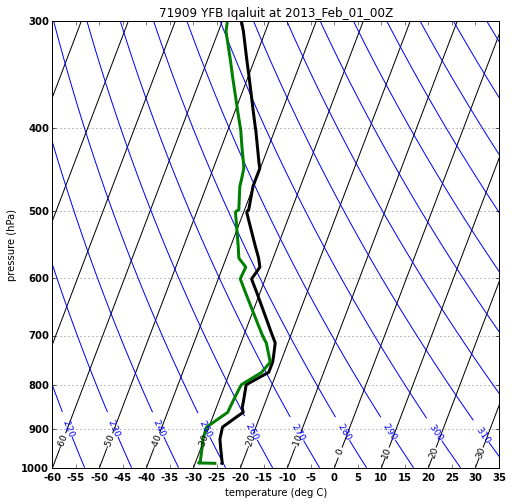

In [52]:
triplets=zip(sounding['temp'],sounding['dwpt'],sounding['pres'])
xcoord_T=[]
xcoord_Td=[]
for a_temp,a_dew,a_pres in triplets:
    xcoord_T.append(convertTempToSkew(a_temp,a_pres,skew))
    xcoord_Td.append(convertTempToSkew(a_dew,a_pres,skew))
ax.plot(xcoord_T,sounding['pres'],color='k',label='temp')
ax.plot(xcoord_Td,sounding['pres'],color='g',label='dew')
fig.canvas.draw()

#
#  make the last two lines added to the plot (temp and dewpoint)
#  thicker
#
[line.set(linewidth=3) for line in ax.lines[-2:]]
ax.set(title=title)
display(fig)

##Second objective: Draw a line of constant saturation mixing ratio $r_s=10 \ \mathrm{g \ kg}^{-1}$ between 1000 and 400 hPa.
Rootfind on $T$ that gives you constant $\theta_e$. Specifically, I want to rootfind the temperature that satisfies (2.20) in Thompkins,$\\[2mm]$

$$r_s=\frac{\epsilon e_s(T)}{p-e_s(T)}=0.01 \ \mathrm{kg \ kg}^{-1},\\[2mm]$$

where $\epsilon=R_d/R_v=0.622$, and I will choose a range of pressures $p$. I'll follow as closely as possible the working example in clausius_comparison.ipynb.

In [64]:
#Imports

import a405thermo.rootfinder as rf
from importlib import reload
reload(rf)

<module 'a405thermo.rootfinder' from 'C:\\Users\\Bryan\\repos\\A405\\a405thermo\\rootfinder.py'>

In [65]:
#Constants

epsilon = 0.622     #dimensionless

In [66]:
#Define e_sat.

def find_esat(temp):
    """
      Description: Find the saturation vapour pressure as a function of temperature, using eq. (2.15) in Thompkins.
      Input: The temperature, temp (K)
      Output: The saturation vapour pressure, e_sat (hPa)
      """
    
    e_sat = 611.2*np.exp((17.67*(temp - 273))/((temp - 273) + 243.5))
    e_sat = e_sat*0.01
    return e_sat

In [67]:
def zero_rsat(temp, rsat_target, press):
    """
      find the saturation temperature for 
      a given rsat,press, by rootfinding this zero
      
      input: temp (guess) (K)
             rsat (kg/kg)
             press (hPa)
      output: residual
      
      see thompkins 2.20
     
    """
    e_sat = find_esat(temp)
    rsat_zero = rsat_target - epsilon*e_sat/(press - e_sat)
    return rsat_zero

def find_rsat(T_0, rsat_target, press):
    """
       Description: Find the temp that produces rsat at press.
       Input: A base temperature for finding e_sat, T_0 (K)
              The target saturation mixing ratio, rsat (kg/kg)
              The pressure, press (hPa)
       Output: The temperature, temp (K)
    """
    brackets = rf.find_interval(zero_rsat, T_0, rsat_target, press)
    temp = rf.fzero(zero_rsat, brackets, rsat_target, press)
    return temp

In [74]:
#Set up an array of pressure values

pressures = np.linspace(400, 1000, 50)    #hPa

In [69]:
#Set a value of T_0 and the target value of r_sat

temp_0 = 273.        #K
target_rsat = 0.01   #kg/kg

In [77]:
#Find the temperatures. Get them in degrees Celsius for plotting on the tephigram.

temp_list = []

for press_val in pressures:
    temp_root = find_rsat(temp_0, target_rsat, press_val)
    temp_list.append(temp_root - 273.15)

Now I need to convert the temperatures to skew coordinates. For this I can use the function convertTempToSkew from above. To link up temperatures and pressures I can use the zip feature.

In [85]:
#Combine temperatures and pressures using zip

skewT_data = []

for skew_temp, skew_press in zip(temp_list, pressures):
    skew_data = convertTempToSkew(skew_temp, skew_press, skew)
    skewT_data.append(skew_data)

C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


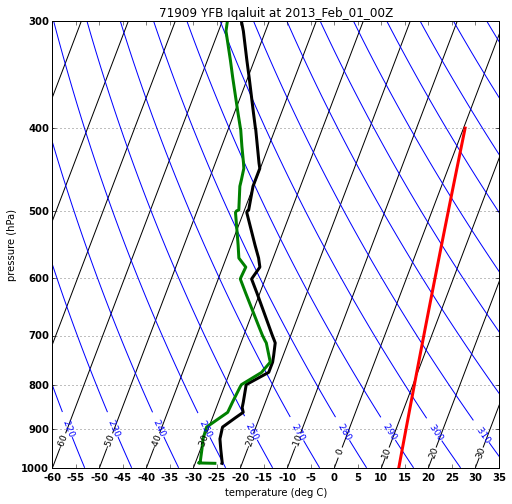

In [86]:
#Add the line to the skew T plot

out = ax.plot(skewT_data, pressures, color='r', label='r_sat', linewidth=3.)
display(fig)

##Third objective: Add a line of constant $\theta_{es}$ to my skew-T profile.

Use equation (20) from the equivalent potential temperature notes:$\\[2mm]$

$$\theta_{es}=\theta\exp\left(\frac{l_vr_s}{c_pT}\right),\\[2mm]$$

where I will take the enthalpy of evaporation $l_v$ from the day 9 notebook, will take $r_s=0.01 \ \mathrm{kg \ kg}^{-1}$ as above, and $c_p=1004 \ \mathrm{J \ kg}^{-1} \ \mathrm{K}^{-1}$. I can use the same root-finding techniques to calculate $\theta_{es}$ for different values of temperature $T$. I will set a $\theta_{es}$ target of 300 K.

In [90]:
#Constants

c_pv = 1870.      #J kg^-1 K^-1
c_l = 4187.       #J kg^-1 K^-1
base_temp = 273.  #K
l_0 = 2.501e6     #J kg^-1
c_p = 1004.       #J kg^-1 K^-1
r_s = 0.01        #kg kg^-1

In [98]:
def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    Rd = 287.  # J/kg/K
    p0 = 1000.  #hPa
    theta = temp*(p0/press)**(Rd/c_p)
    return theta

def zero_theta_es(temp, theta_es_target, press):
    """
      find the saturation temperature for 
      a given rsat,press, by rootfinding this zero
      
      input: temp (guess) (K)
             rsat (kg/kg)
             press (hPa)
      output: residual
      
      see thompkins 2.20
     
    """
    l_v = (c_pv - c_l)*(temp - base_temp) + l_0
    theta_es_zero = theta_es_target - theta_from_temp(temp, press)*np.exp((l_v*r_s)/(c_p*temp))
    return theta_es_zero

def find_temp(T_0, theta_es_target, press):
    """
       Description: Find the temp that produces rsat at press.
       Input: A base temperature for finding e_sat, T_0 (K)
              The target saturation mixing ratio, rsat (kg/kg)
              The pressure, press (hPa)
       Output: The temperature, temp (K)
    """
    brackets = rf.find_interval(zero_theta_es, T_0, theta_es_target, press)
    temp = rf.fzero(zero_theta_es, brackets, theta_es_target, press)
    return temp

In [93]:
#Set a value of T_0 and the target value of r_sat

temp_0 = 273.            #K
target_theta_es = 300.   #K

In [99]:
temp_list2 = []

for press_val in pressures:
    temp_root2 = find_temp(temp_0, target_theta_es, press_val)
    temp_list2.append(temp_root2 - 273.15)

In [101]:
#Combine temperatures and pressures using zip

skewT_data2 = []

for skew_temp2, skew_press2 in zip(temp_list2, pressures):
    skew_data2 = convertTempToSkew(skew_temp2, skew_press2, skew)
    skewT_data2.append(skew_data2)

C:\Users\Bryan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


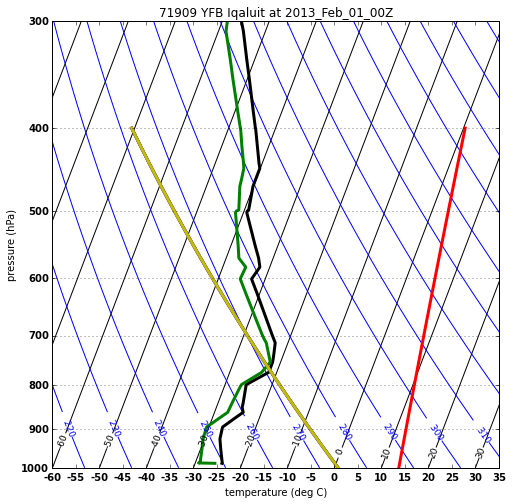

In [104]:
#Add the line to the skew T plot

out = ax.plot(skewT_data2, pressures, color='y', label='r_sat', linewidth=3.)
display(fig)